In [1]:
import matplotlib.pyplot as plt
from math import acos, pi
from classifier import *
from convex_hull import *
from primitives import *
import random

In [2]:
def plotCH(cl,test,l1):
    ch = cl.ch1
    ch2 = cl.ch2
    coord = ch.hull
    coord2 =ch2.hull
    coord2.append(coord2[0])
    coord.append(coord[0]) #repeat the first point to create a 'closed loop'

    xs = list(map( lambda pt : pt.x, coord)) #create lists of x and y values
    ys = list(map( lambda pt : pt.y, coord))
    xs2 = list(map( lambda pt : pt.x, coord2)) #create lists of x and y values
    ys2 = list(map( lambda pt : pt.y, coord2))
    print('Interpect' if(not areIndependent(ch,ch2)) else 'Dont Intercept')
    plt.figure()

    plt.scatter(list(map( lambda pt : pt.x, ch2.all_points)), list(map( lambda pt : pt.y, ch2.all_points)))
    plt.scatter(list(map( lambda pt : pt.x, ch.all_points)), list(map( lambda pt : pt.y, ch.all_points)))
    plt.plot(xs2,ys2)
    plt.plot(xs,ys) 
    if(areIndependent(ch,ch2)):
        p,q = cl.p,cl.q
        qp = distP2P(q,p)
        """ pr = distP2P(r,p)
        rq = distP2P(q,r)
        theta = acos((qp**2+pr**2-rq**2)/(2*qp*pr)) * (180/pi) """
        #print(theta)
        lx = [p.x,q.x]
        ly = [p.y,q.y]
        plt.plot(lx,ly)
        """ lx = [r.x,s.x]
        ly = [r.y,s.y] """
        plt.plot(lx,ly)
        plt.plot([cl.r.x,cl.s.x],[cl.r.y,cl.s.y])
    for pt in test:
        color = 'orange' if(pt.label == l1) else 'blue'
        plt.scatter(pt.x,pt.y,color=color,alpha=0.8)
    plt.show()

In [3]:
def sample(dataSet,l1,l2):
    #print("SEED:",random.seed)
    random.shuffle(dataSet1)
    trainSize = int(0.7*len(dataSet))
    train,test = dataSet[:trainSize],dataSet1[trainSize:]
    print(len(test))


    for pt in train:
        if(pt.label == l1):
            points1.append(pt)
        elif(pt.label == l2):
            points2.append(pt)


    cl = Classifier(points1,points2,l1,l2)

    if cl.hasClassifier:
        for pt in test:
            cl.classify(pt)
        cl.printMetrics()

    #print("TP: ",cl.trueL1,"TN: ",cl.trueL2,"FP: ",cl.falseL1, "FN: ",cl.falseL2)
    plotCH(cl,test,l1)
    return cl.hasClassifier

In [4]:
fileName = 'Iris.csv'
l1 = 'Iris-setosa'
l2 = 'Iris-versicolor'
f = open(fileName, "r",encoding='utf-8-sig')
points1 = []
points2 = []

dataSet1 = []
dataSet2 = []
dataSet3 = []
for line in f:
    id,sepalLen,sepalWid,petalLen,petalWid,label = line.rstrip('\n').split(',')
    dataSet1.append(Point(float(petalWid),float(petalLen),label))
    dataSet2.append(Point(float(sepalWid),float(sepalLen),label))

    dataSet3.append(Point(float(petalWid),float(sepalWid),label))

30
0.4 1.9
1.1 3.0
a:  0.7000000000000001 b:  1.1 c:  -3.22
Precisao:  1.0
Recall 1.0
F1:  1.0
Accuracy:  1.0
Dont Intercept


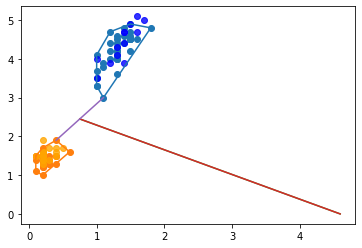

True

In [5]:
sample(dataSet1,l1,l2)

30
3.5 5.5
3.0 5.6
a:  -0.5 b:  0.09999999999999964 c:  1.070000000000002
Precisao:  0.5666666666666667
Recall 1.0
F1:  0.7234042553191489
Accuracy:  0.5666666666666667
Dont Intercept


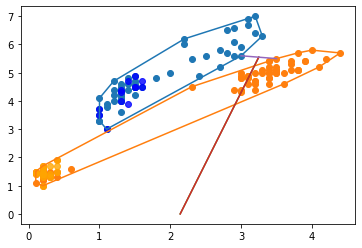

True

In [6]:
sample(dataSet2,l1,l2)

In [8]:
sample(dataSet3,l1,l2)

30
Nao foi possivel criar o classificador, os dados nao sao independentes.


ZeroDivisionError: division by zero

In [ ]:
""" cl = Classifier(cv1,cv2)
cl.separatingAxis()
plotCH(cl)
cl.classify(Point(200,200)) """

' cl = Classifier(cv1,cv2)\ncl.separatingAxis()\nplotCH(cl)\ncl.classify(Point(200,200)) '